# Kevin Trochez
# CS 4662 Machine Learning & Deep Learning
# Final Project : Chinese MNIST 
# 05/25/2025

In [752]:
# !pip install opencv-python


In [753]:
# !pip install opencv-python-headless


# Chinese MNIST Classification Using Machine Learning and Deep Learning

This notebook explores multiple algorithms to classify Chinese characters using the Chinese MNIST Dataset:
- CNN (Convolutional Neural Network) and DNN (Deep Neural Network)
- Dimensionality Reduction (PCA and Autoencoders)
- Restricted Boltzmann Machine (RBM) and Deep Belief Machine (DBM)
- LeNet-5
- VGG16 and VGG19

**Dataset:** [Chinese MNIST Dataset](https://www.kaggle.com/datasets/gpreda/chinese-mnist)

---


# Step 1 Import Required Libraries

In [934]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, r2_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.applications import VGG16, VGG19

# Step 2 Load and Preprocess the Data

In [759]:
# Define the path to the dataset
data_path = "C:/Users/Letak/School/cs4662AdvanceMachineLearning/Homework/cs4662Project/chinese_mnist/"
image_folder_path = "C:/Users/Letak/School/cs4662AdvanceMachineLearning/Homework/cs4662Project/chinese_mnist/data/"
# Load labels
labels_df = pd.read_csv(f"{data_path}/chinese_mnist.csv")

In [760]:
# View the shape and first few rows
print(labels_df.shape)
print(labels_df.head())

(15000, 5)
   suite_id  sample_id  code  value character
0         1          1    10      9         九
1         1         10    10      9         九
2         1          2    10      9         九
3         1          3    10      9         九
4         1          4    10      9         九


In [761]:
# Define function to load and preprocess images
def load_images(image_folder_path, labels_df):
    images = []
    labels = []
    for index, row in labels_df.iterrows():
        # Correct path with /Data included
        img_path = f"{image_folder_path}/input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg"
        
        # Check if the file exists before loading
        if not os.path.exists(img_path):
            print(f"File not found: {img_path}")
            continue
        
        # Read the image in grayscale mode
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Check if the image was loaded correctly
        if img is None:
            print(f"Error loading image: {img_path}")
            continue
        
        # Resize and normalize the image
        img = cv2.resize(img, (64, 64)) / 255.0
        images.append(img)
        labels.append(row['character'])
    
    return np.array(images), np.array(labels)


In [762]:
# Test path for the first image
sample_img_path = f"{image_folder_path}/input_1_1_1.jpg"

if os.path.exists(sample_img_path):
    print(f"Sample image path is correct: {sample_img_path}")
else:
    print(f"File not found: {sample_img_path}")


Sample image path is correct: C:/Users/Letak/School/cs4662AdvanceMachineLearning/Homework/cs4662Project/chinese_mnist/data//input_1_1_1.jpg


In [763]:
# Load images and labels again with the corrected path
X, y = load_images(image_folder_path, labels_df)

print(f"✅ Successfully loaded {len(X)} images.")


✅ Successfully loaded 15000 images.


In [764]:
# Reshape X to add channel dimension (for CNN)
X = X.reshape(-1, 64, 64, 1)

In [765]:
# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [766]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


In [767]:
print(f"Shape of X training data: {X_train.shape}")
print(f"Shape of X testing data: {X_test.shape}")
print(f"Shape of y training data: {y_train.shape}")
print(f"Shape of y testing data: {y_test.shape}")

Shape of X training data: (12000, 64, 64, 1)
Shape of X testing data: (3000, 64, 64, 1)
Shape of y training data: (12000, 15)
Shape of y testing data: (3000, 15)


# Build and Train CNN Model

In [769]:
# Build CNN Model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(y_categorical.shape[1], activation='softmax'))

C:\Users\Letak\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [770]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [771]:
# Train the CNN Model
history_cnn = cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.3498 - loss: 2.0234 - val_accuracy: 0.7821 - val_loss: 0.6831
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7797 - loss: 0.6792 - val_accuracy: 0.8942 - val_loss: 0.3645
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8720 - loss: 0.3925 - val_accuracy: 0.9021 - val_loss: 0.2852
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9119 - loss: 0.2829 - val_accuracy: 0.9358 - val_loss: 0.2000
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9333 - loss: 0.1900 - val_accuracy: 0.9471 - val_loss: 0.1746
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9501 - loss: 0.1485 - val_accuracy: 0.9546 - val_loss: 0.1454
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9588 - loss: 0.1250 - val_accuracy: 0.9538 - val_loss: 0.1443
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9657 - loss: 0.1100 - val_accu

In [773]:
# Evaluate CNN Model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f'CNN Model Accuracy: {cnn_acc:.2f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9599 - loss: 0.1602
CNN Model Accuracy: 0.96


# 94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9550 - loss: 0.1492
# CNN Model Accuracy: 0.96

# Apply PCA for Dimensionality Reduction

In [776]:
# Reshape X for PCA
X_flattened = X.reshape(X.shape[0], -1)

In [777]:
# Standardize data for PCA
scaler = StandardScaler()
X_flattened_scaled = scaler.fit_transform(X_flattened)


In [778]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=100)  # Reduce to 100 components
X_pca = pca.fit_transform(X_flattened_scaled)


In [779]:
# Split PCA data for training and testing
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)



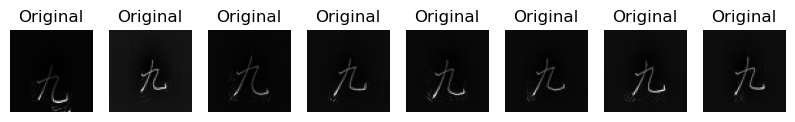

In [780]:
# Plot original images
n = 8
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_flattened_scaled[i].reshape(64, 64), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.show()

# Build and Train DNN Model

In [782]:
# Build DNN Model
dnn_model = Sequential()
dnn_model.add(Dense(256, input_shape=(X_train_pca.shape[1],), activation='relu'))
dnn_model.add(Dropout(0.3))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

C:\Users\Letak\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [783]:
# Compile DNN Model
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [784]:
# Train DNN Model
history_dnn = dnn_model.fit(X_train_pca, y_train_pca, validation_split=0.2, epochs=25, batch_size=64, verbose=1)


Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2142 - loss: 2.8659 - val_accuracy: 0.4725 - val_loss: 1.8132
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4393 - loss: 1.8585 - val_accuracy: 0.5587 - val_loss: 1.5191
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5096 - loss: 1.5705 - val_accuracy: 0.6100 - val_loss: 1.3490
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5584 - loss: 1.3727 - val_accuracy: 0.6517 - val_loss: 1.1792
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5888 - loss: 1.2517 - val_accuracy: 0.6779 - val_loss: 1.0810
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6161 - loss: 1.1670 - val_accuracy: 0.6958 - val_loss: 1.0180
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6459 - loss: 1.0710 - val_accuracy: 0.7158 - val_loss: 0.9763
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6618 - loss: 1.0033 - val_accuracy: 0.

In [785]:
# Evaluate DNN Model
dnn_loss, dnn_acc = dnn_model.evaluate(X_test_pca, y_test_pca)
print(f'DNN Model Accuracy: {dnn_acc:.2f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7851 - loss: 0.8144
DNN Model Accuracy: 0.79


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7364 - loss: 0.9170
DNN Model Accuracy: 0.75

# Build and Train Autoencoder 

In [788]:
# Define Autoencoder architecture
input_img = Input(shape=(4096,))
# Add Batch Normalization after Dense layers
encoded = Dense(1024, activation='relu')(input_img)
encoded = BatchNormalization()(encoded)  # Batch Norm after dense
encoded = Dense(512, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(128, activation='relu')(encoded)

# Decoder with Batch Normalization
decoded = Dense(256, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(1024, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4096, activation='sigmoid')(decoded)

In [789]:
# Build Autoencoder
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [790]:
# Define early stopping to stop training if no improvement after 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [791]:
# Save history object when training autoencoder
history_autoencoder = autoencoder.fit(X_flattened_scaled, X_flattened_scaled,
                                      epochs=25, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - loss: 1.0590 - val_loss: 0.4988
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.9775 - val_loss: 0.4861
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.9194 - val_loss: 0.4803
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.9138 - val_loss: 0.4816
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.9410 - val_loss: 0.4756
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.9559 - val_loss: 0.4742
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - loss: 0.8474 - val_loss: 0.4714
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.8580 - val_loss: 0.4750
Epoch 9/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - loss: 0.9058 - val_loss: 0.4698
Epoch 10/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - loss: 0.9455 - val_loss: 0.4687
Epoch 11/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.9275 - val_loss: 0.4705
Epoch 12/25
188/188 ━━━━━━━━━━

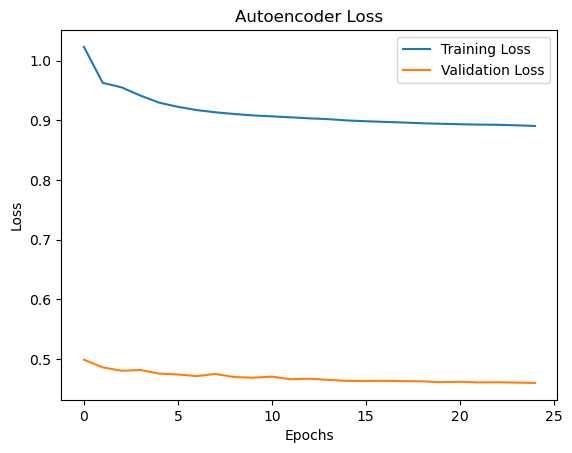

In [792]:
# Plot training and validation loss
plt.plot(history_autoencoder.history['loss'], label='Training Loss')
plt.plot(history_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


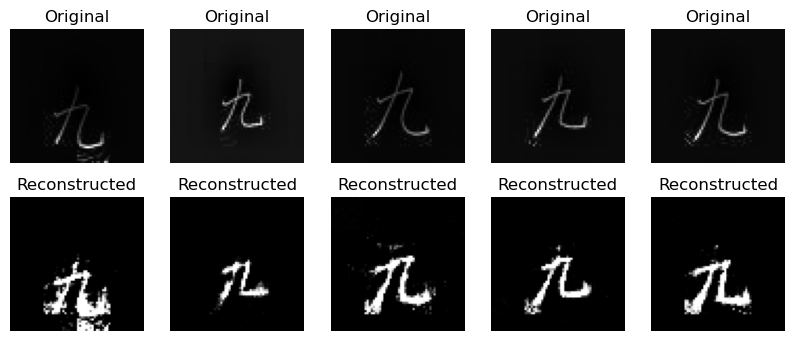

In [793]:
# Predict reconstructed images
reconstructed_imgs = autoencoder.predict(X_flattened_scaled)

# Plot original and reconstructed images
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_flattened_scaled[i].reshape(64, 64), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_imgs[i].reshape(64, 64), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [794]:
# Calculate mean squared error (MSE) for reconstruction quality


mse_scores = []
for i in range(len(X_flattened_scaled)):
    mse = mean_squared_error(X_flattened_scaled[i], reconstructed_imgs[i])
    mse_scores.append(mse)

print(f"Average MSE for Autoencoder: {np.mean(mse_scores):.4f}")


Average MSE for Autoencoder: 0.8048


# Average MSE for Autoencoder: 0.8199

In [796]:
input_img_cnn = Input(shape=(64, 64, 1))  # Reshape images for CNN autoencoder

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_cnn)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [797]:
autoencoder_cnn = Model(input_img_cnn, decoded)
autoencoder_cnn.compile(optimizer='adam', loss='mean_squared_error')

In [798]:
# Reshape data before training
X_cnn = X.reshape(-1, 64, 64, 1)

In [799]:
# Train CNN autoencoder
history_autoencoder_cnn = autoencoder_cnn.fit(X_cnn, X_cnn,
                                      epochs=5, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - loss: 0.0414 - val_loss: 0.0024
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.0032 - val_loss: 0.0024


Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.0032 - val_loss: 0.0024

Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8771 - val_loss: 0.4550

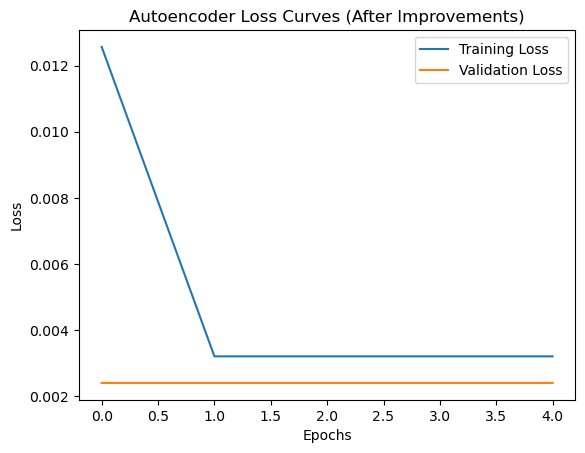

In [802]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history_autoencoder_cnn.history['loss'], label='Training Loss')
plt.plot(history_autoencoder_cnn.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss Curves (After Improvements)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [803]:
# Calculate RMSE for reconstructed images
rmse_scores = []
for i in range(len(X_cnn)):
    mse = mean_squared_error(X_cnn[i].reshape(-1), reconstructed_imgs[i].reshape(-1))
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

# Average RMSE
print(f"Average RMSE for CNN Autoencoder: {np.mean(rmse_scores):.4f}")

Average RMSE for CNN Autoencoder: 0.1294


# Average MSE for Autoencoder: 0.8104

# Train RBM + Logistic Regression

In [806]:
# Define and train RBM model
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=10, random_state=42)

In [807]:
# Fit RBM on training data
X_train_rbm = rbm.fit_transform(X_train_pca)
X_test_rbm = rbm.transform(X_test_pca)

In [808]:
# Logistic Regression after RBM
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_rbm, y_train_pca)

LogisticRegression(max_iter=1000)

In [809]:
# Evaluate RBM + Logistic Regression
rbm_pred = logistic.predict(X_test_rbm)
print(classification_report(y_test_pca, rbm_pred))

              precision    recall  f1-score   support

           0       0.11      0.97      0.19       182
           1       0.00      0.00      0.00       201
           2       0.21      0.01      0.03       217
           3       0.13      0.18      0.15       198
           4       0.16      0.03      0.05       201
           5       0.20      0.00      0.01       206
           6       0.33      0.00      0.01       207
           7       0.28      0.06      0.10       198
           8       0.16      0.02      0.04       188
           9       0.11      0.02      0.04       203
          10       0.04      0.01      0.01       189
          11       0.36      0.04      0.07       221
          12       0.14      0.13      0.13       194
          13       0.00      0.00      0.00       209
          14       0.24      0.83      0.37       186

    accuracy                           0.14      3000
   macro avg       0.16      0.15      0.08      3000
weighted avg       0.17   

# Build and Train LeNet-5 Model

In [813]:

# Define LeNet-5 adapted for Chinese MNIST (60x60x1 input)
def build_lenet5(input_shape=(64, 64, 1), num_classes=15):  # Chinese MNIST has 15 classes
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape, padding='same'),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='tanh'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [814]:
K.clear_session()

In [815]:
# Compile the model
lenet_model = build_lenet5()
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Letak\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [816]:
# Show the model summary
lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 32, 32, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 14, 14, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       376,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,451 (1.49 MB)

 Trainable params: 390,451 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [817]:
# Train LeNet-5
history_lenet = lenet_model.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=15, batch_size=64)

Epoch 1/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3763 - loss: 2.0030 - val_accuracy: 0.6103 - val_loss: 1.2560
Epoch 2/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6814 - loss: 1.0807 - val_accuracy: 0.7363 - val_loss: 0.8738
Epoch 3/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7761 - loss: 0.7421 - val_accuracy: 0.7937 - val_loss: 0.6647
Epoch 4/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8427 - loss: 0.5283 - val_accuracy: 0.8333 - val_loss: 0.5277
Epoch 5/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8793 - loss: 0.3939 - val_accuracy: 0.8627 - val_loss: 0.4344
Epoch 6/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9149 - loss: 0.2835 - val_accuracy: 0.8773 - val_loss: 0.3686
Epoch 7/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9343 - loss: 0.2233 - val_accuracy: 0.8883 - val_loss: 0.3492
Epoch 8/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9499 - loss: 0.1792 - val_accu

# Train and Build VVG16 and VVG19 Models

In [819]:
def build_vgg16_custom(input_shape=(64, 64, 1), num_classes=15):
    # VGG16 expects 3 channels, so we need to duplicate grayscale channel
    input_layer = Input(shape=input_shape)
    # Expand grayscale (1 channel) into 3 channels
    x = Conv2D(3, (1, 1), padding='same', activation='linear')(input_layer)  # (64, 64, 3)

    base_model = VGG16(include_top=False, input_tensor=x, weights=None)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model


In [820]:
# VGG16
vgg16_model = build_vgg16_custom()
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [821]:
# Train VGG16
history_vgg16 = vgg16_model.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=10, batch_size=64)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.0633 - loss: 2.7088 - val_accuracy: 0.0660 - val_loss: 2.7083
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.0616 - loss: 2.7083 - val_accuracy: 0.0627 - val_loss: 2.7085
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.0707 - loss: 2.7081 - val_accuracy: 0.0630 - val_loss: 2.7086
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.0689 - loss: 2.7079 - val_accuracy: 0.0627 - val_loss: 2.7086
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.0644 - loss: 2.7080 - val_accuracy: 0.0607 - val_loss: 2.7087
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.0704 - loss: 2.7081 - val_accuracy: 0.0607 - val_loss: 2.7087
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.0684 - loss: 2.7077 - val_accuracy: 0.0607 - val_loss: 2.7087
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.0685 - loss: 2.7081 - val_accu

In [822]:
def build_vgg19_custom(input_shape=(64, 64, 1), num_classes=15):
    # VGG19 expects 3 channels too
    input_layer = Input(shape=input_shape)
    # Expand grayscale (1 channel) into 3 channels
    x = Conv2D(3, (1, 1), padding='same', activation='linear')(input_layer)  # (64, 64, 3)

    base_model = VGG19(include_top=False, input_tensor=x, weights=None)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model


In [823]:
# VGG19
vgg19_model = build_vgg19_custom()
vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [824]:
# Train VGG19
history_vgg19 = vgg19_model.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=10, batch_size=64)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.0636 - loss: 2.7090 - val_accuracy: 0.0620 - val_loss: 2.7084
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.0618 - loss: 2.7083 - val_accuracy: 0.0627 - val_loss: 2.7086
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.0653 - loss: 2.7079 - val_accuracy: 0.0620 - val_loss: 2.7086
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.0659 - loss: 2.7081 - val_accuracy: 0.0607 - val_loss: 2.7087
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.0689 - loss: 2.7081 - val_accuracy: 0.0607 - val_loss: 2.7087
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.0663 - loss: 2.7082 - val_accuracy: 0.0607 - val_loss: 2.7086
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.0670 - loss: 2.7081 - val_accuracy: 0.0620 - val_loss: 2.7087
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.0687 - loss: 2.7081 - val_accu

In [956]:
# Evaluate all models
cnn_score = cnn_model.evaluate(X_test, y_test, verbose=0)
dnn_score = dnn_model.evaluate(X_test_pca, y_test_pca, verbose=0)
lenet_score = lenet_model.evaluate(X_test, y_test, verbose=0)
vgg16_score = vgg16_model.evaluate(X_test, y_test, verbose=0)
vgg19_score = vgg19_model.evaluate(X_test, y_test, verbose=0)

# Print test accuracies
print("CNN Test Accuracy:     {:.4f}".format(cnn_score[1]))
print("DNN Test Accuracy:     {:.4f}".format(dnn_score[1]))
print("LeNet-5 Test Accuracy: {:.4f}".format(lenet_score[1]))
print("VGG16 Test Accuracy:   {:.4f}".format(vgg16_score[1]))
print("VGG19 Test Accuracy:   {:.4f}".format(vgg19_score[1]))


CNN Test Accuracy:     0.9630
DNN Test Accuracy:     0.7910
LeNet-5 Test Accuracy: 0.9270
VGG16 Test Accuracy:   0.0607
VGG19 Test Accuracy:   0.0607


# Model Evaluations

In [968]:
def evaluate_model(model, X_data, y_data, label_encoder=None, model_name="Model"):
    print(f"\n=== {model_name} Evaluation ===")
    preds = model.predict(X_data)
    pred_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(y_data, axis=1)

    print(f"Accuracy: {accuracy_score(true_classes, pred_classes):.4f}")
    print(f"Precision (Macro): {precision_score(true_classes, pred_classes, average='macro'):.4f}")
    print(f"Recall (Macro): {recall_score(true_classes, pred_classes, average='macro'):.4f}")
    print(f"F1 Score (Macro): {f1_score(true_classes, pred_classes, average='macro'):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(true_classes, pred_classes)}")
    print(f"Classification Report:\n{classification_report(true_classes, pred_classes)}")

    # RMSE, MAE, R^2 — for regression type metrics
    rmse = root_mean_squared_error(y_data, preds)
    mae = mean_absolute_error(y_data, preds)
    r2 = r2_score(y_data, preds)
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    # AUC Score (only works if multi-class set correctly)
    try:
        auc = roc_auc_score(y_data, preds, multi_class='ovr')
        print(f"AUC Score: {auc:.4f}")
    except ValueError as e:
        print(f"AUC could not be calculated: {e}")

In [970]:
evaluate_model(cnn_model, X_test, y_test, label_encoder, model_name="CNN Model")



=== CNN Model Evaluation ===
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy: 0.9630
Precision (Macro): 0.9632
Recall (Macro): 0.9639
F1 Score (Macro): 0.9633
Confusion Matrix:
[[181   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  2 193   1   0   1   0   1   0   0   1   1   1   0   0   0]
 [  0   0 213   0   0   0   1   0   0   1   0   1   0   0   1]
 [  0   0   0 185   0  13   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0 189   0   0   4   1   0   2   0   0   0   0]
 [  5   0   0  13   0 188   0   0   0   0   0   0   0   0   0]
 [  0   2   0   1   0   0 202   0   0   0   0   1   0   1   0]
 [  0   0   0   0   5   0   0 190   2   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0 187   0   0   0   1   0   0]
 [  1   0   1   1   0   0   0   0   0 200   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 189   0   0   0   0]
 [  1   1   0   0   2   0   0   0   0   2  11 204   0   0   0]
 [  0   1   0   0   2   0   1   1   0   0   0   0 188   1   0]
 [ 

In [971]:
evaluate_model(dnn_model, X_test_pca, to_categorical(y_test_pca), label_encoder, model_name="DNN Model")



=== DNN Model Evaluation ===
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
Accuracy: 0.7910
Precision (Macro): 0.7949
Recall (Macro): 0.7951
F1 Score (Macro): 0.7913
Confusion Matrix:
[[174   0   0   0   0   5   0   1   0   1   1   0   0   0   0]
 [  0 160   1   0   3   0   3   5   2  13   5   1   6   1   1]
 [  0   1 175   0   2   0   1   1   4   8   1   5   5  10   4]
 [  0   6   0 151   0  32   0   0   0   3   0   3   0   0   3]
 [  0  14   7   0 130   0   1  18   1  19   0   1   5   1   4]
 [ 30   2   0  12   0 156   3   1   0   2   0   0   0   0   0]
 [  0  11   3  15   5   0 159   1   0   2   0   2   0   9   0]
 [  0   8   1   1  24   2   0 139   5   3   0   0  11   1   3]
 [  1   0   2   0   0   0   0   3 178   4   0   0   0   0   0]
 [  7   8   4   2   4   0   0   0   4 171   1   1   1   0   0]
 [  0   1   0   0   0   0   0   0   1   4 158  24   0   0   1]
 [  0   0   2   3   1   0   0   2   0   9  58 140   1   1   4]
 [  0   3   2   0   4   0   2   6   3   2   1   0 164   5   2]
 

In [972]:
evaluate_model(dnn_model, X_test, y_test, label_encoder, model_name="DNN Model2")


=== DNN Model2 Evaluation ===


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
evaluate_model(lenet_model, X_test, y_test, label_encoder, model_name="LeNet-5 Model")


In [ ]:
evaluate_model(vgg16_model, X_test, y_test, label_encoder, model_name="VGG16 Model")


In [ ]:
evaluate_model(vgg19_model, X_test, y_test, label_encoder, model_name="VGG19 Model")


# Accuracy Evaluations

In [833]:
def plot_accuracy(history, title="Model Accuracy"):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

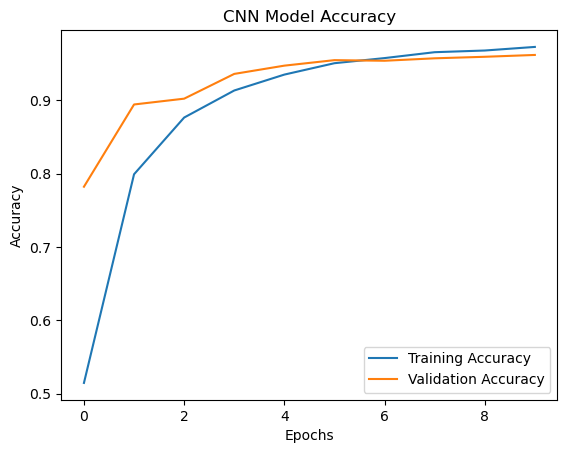

In [834]:
plot_accuracy(history_cnn, "CNN Model Accuracy")

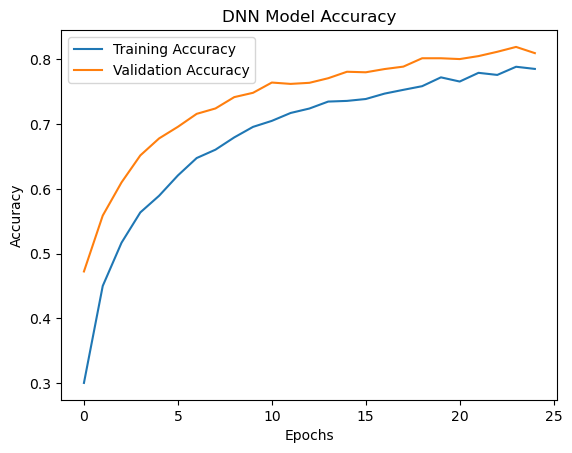

In [835]:
plot_accuracy(history_dnn, "DNN Model Accuracy")

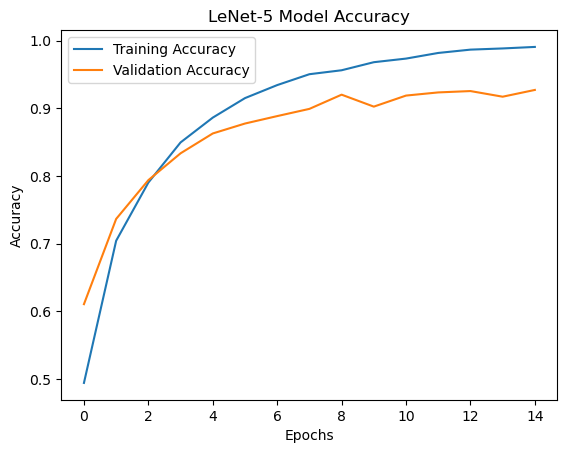

In [836]:
plot_accuracy(history_lenet, "LeNet-5 Model Accuracy")

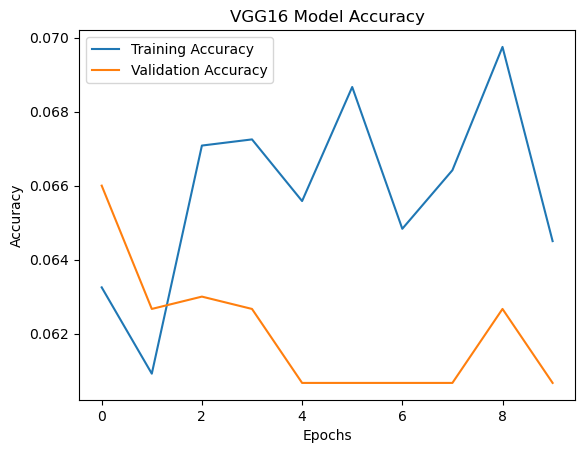

In [837]:
plot_accuracy(history_vgg16, "VGG16 Model Accuracy")

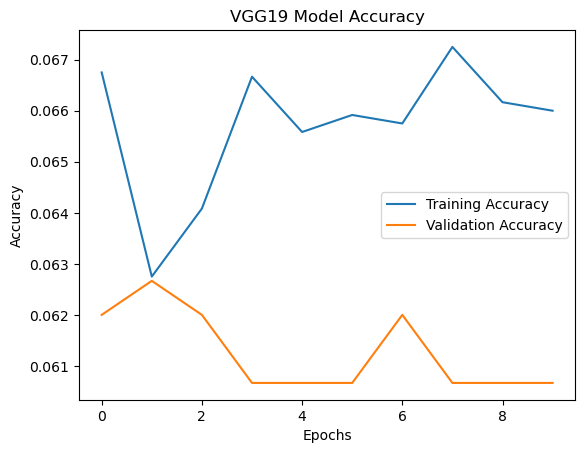

In [838]:
plot_accuracy(history_vgg19, "VGG19 Model Accuracy")

# AUC and ROC

In [939]:
def compute_auc_score(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    try:
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
        print(f"{model_name} AUC Score (OvR): {auc:.4f}")
        return auc
    except ValueError as e:
        print(f"AUC Score could not be calculated for {model_name}: {e}")
        return None

In [940]:
def plot_multiclass_roc(model, X_test, y_test, model_name="Model"):
    y_score = model.predict(X_test)
    n_classes = y_test.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves in grid
    plt.figure(figsize=(12, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curves (One-vs-Rest)')
    plt.legend(loc='lower right', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
CNN AUC Score (OvR): 0.9992
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


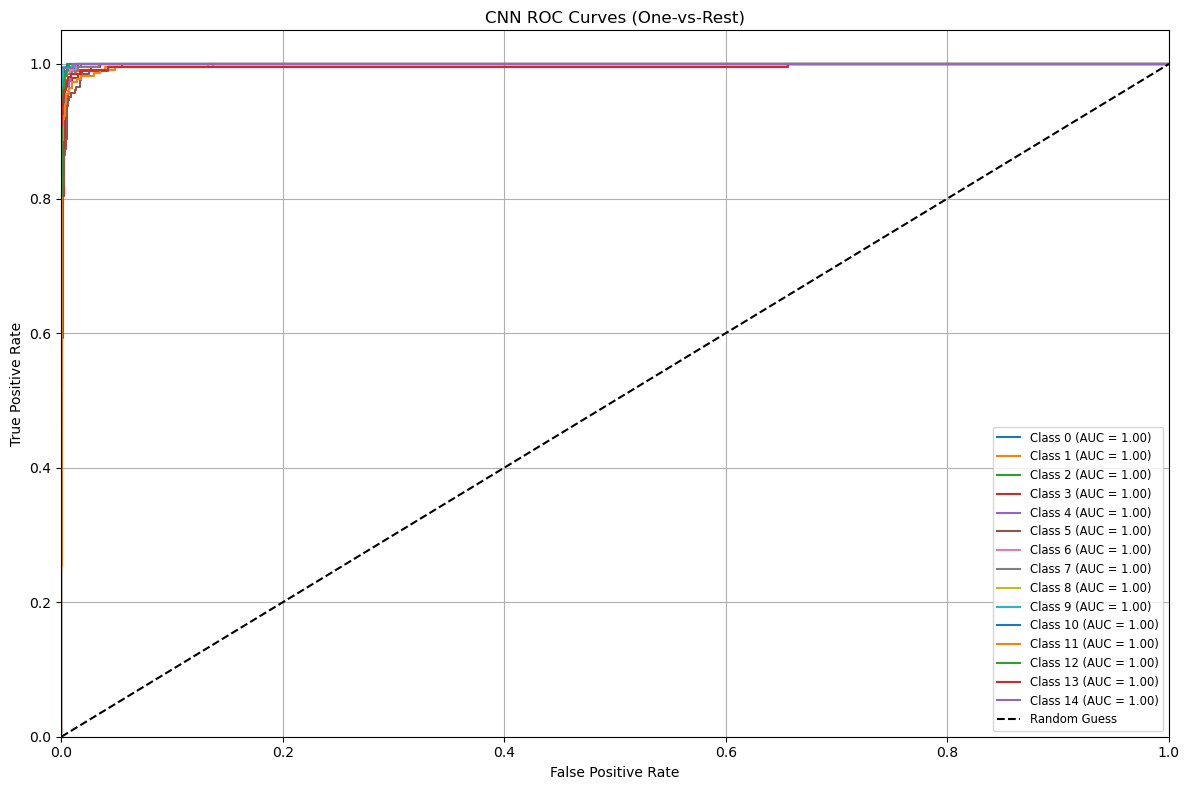

In [941]:
compute_auc_score(cnn_model, X_test, y_test, model_name="CNN")
plot_multiclass_roc(cnn_model, X_test, y_test, model_name="CNN")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
DNN AUC Score (OvR): 0.9823
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step


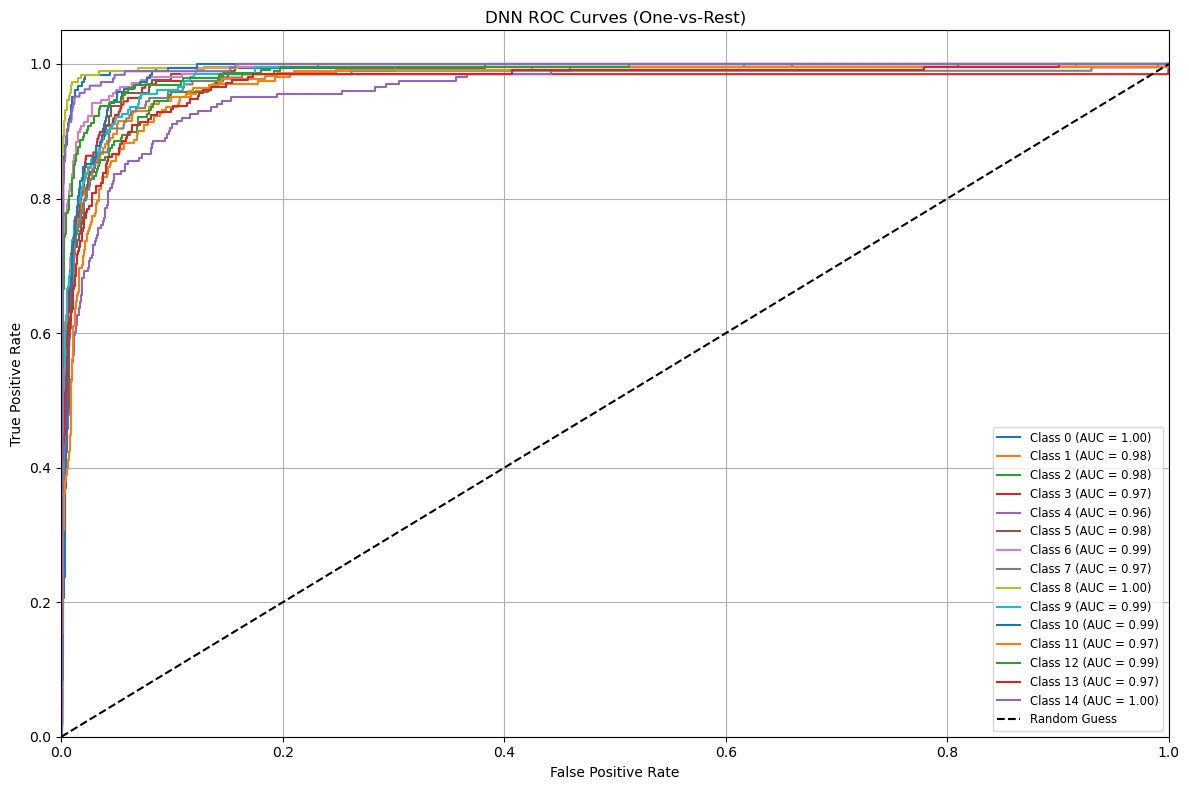

In [942]:

y_test_pca_cat = to_categorical(y_test_pca, num_classes=15)

compute_auc_score(dnn_model, X_test_pca, y_test_pca_cat, model_name="DNN")
plot_multiclass_roc(dnn_model, X_test_pca, y_test_pca_cat, model_name="DNN")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
LeNet-5 AUC Score (OvR): 0.9976
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


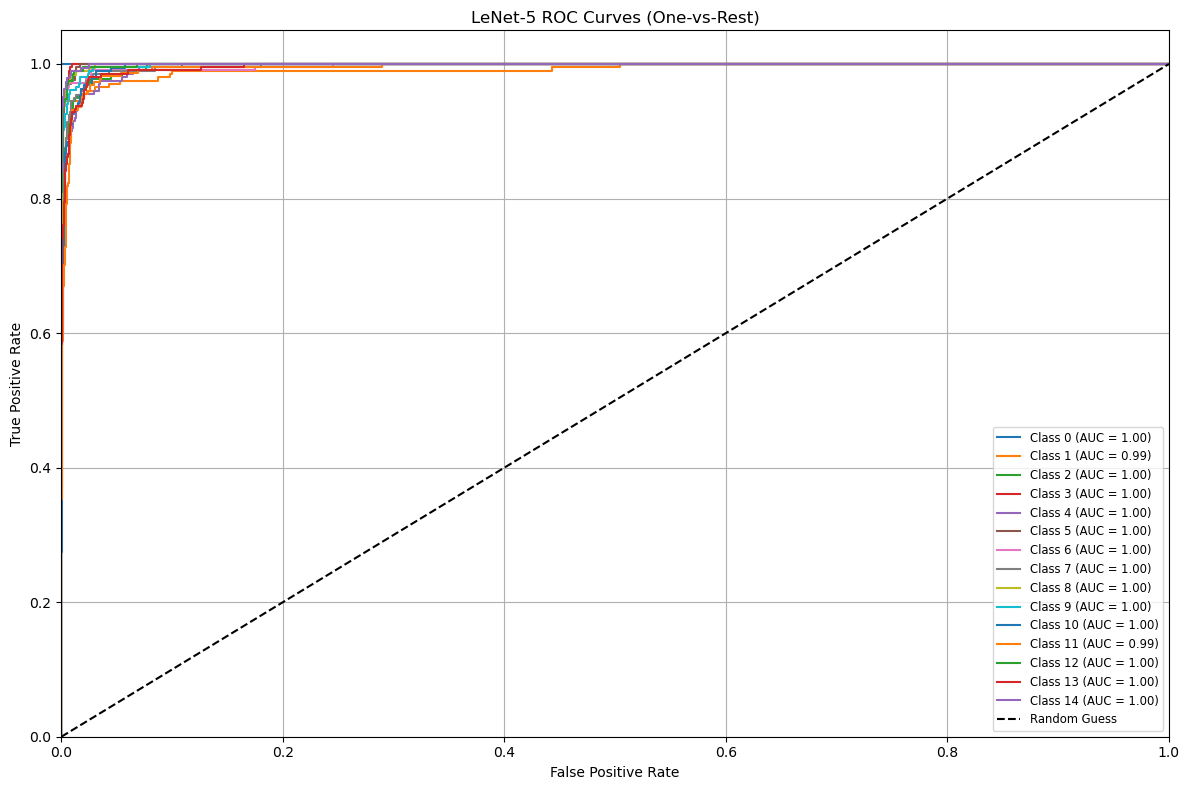

In [943]:
compute_auc_score(lenet_model, X_test, y_test, model_name="LeNet-5")
plot_multiclass_roc(lenet_model, X_test, y_test, model_name="LeNet-5")



94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step
VGG16 AUC Score (OvR): 0.5000
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step


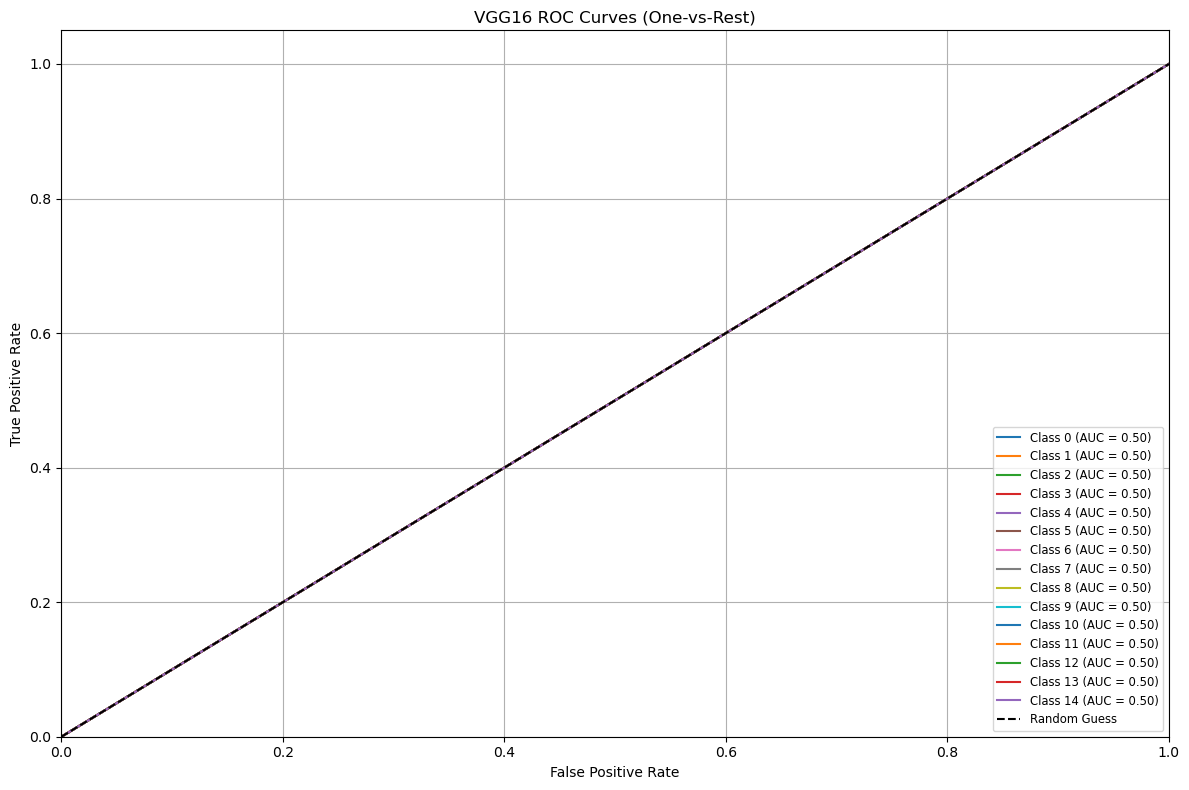

In [944]:
compute_auc_score(vgg16_model, X_test, y_test, model_name="VGG16")
plot_multiclass_roc(vgg16_model, X_test, y_test, model_name="VGG16")


94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step
VGG19 AUC Score (OvR): 0.5000
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step


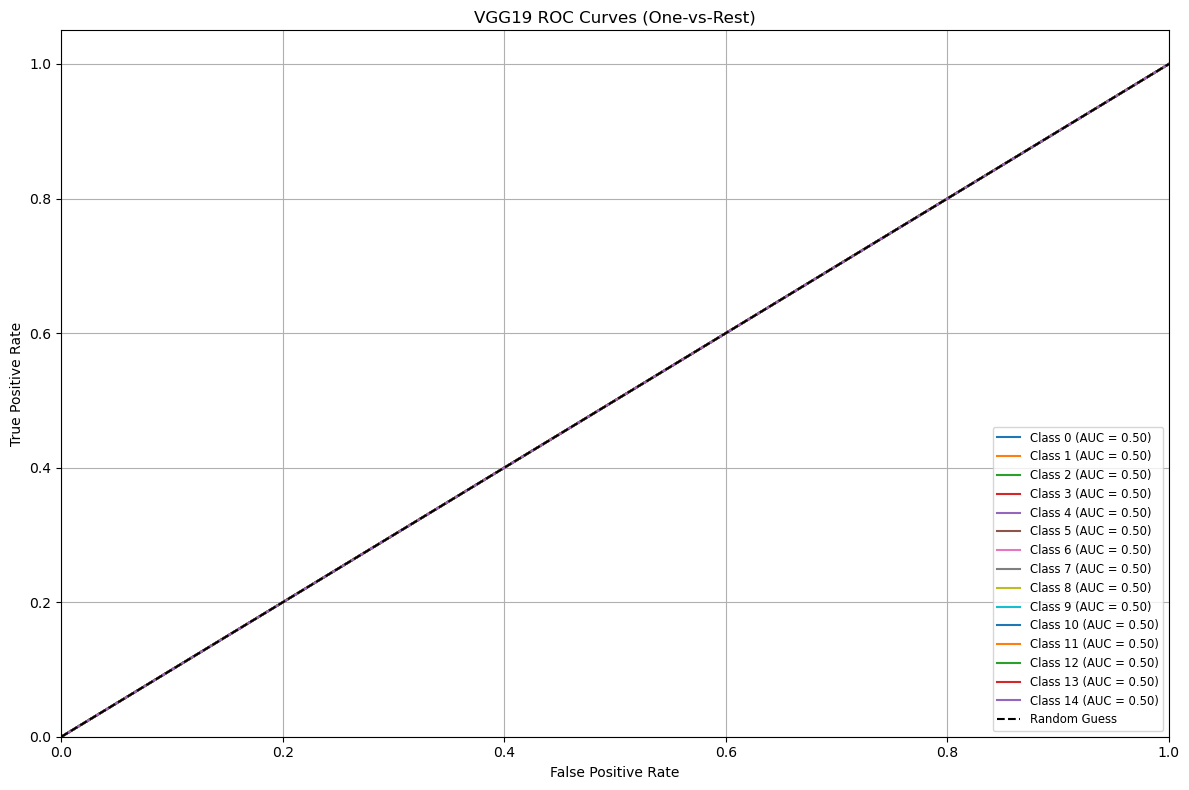

In [945]:
compute_auc_score(vgg19_model, X_test, y_test, model_name="VGG19")
plot_multiclass_roc(vgg19_model, X_test, y_test, model_name="VGG19")


# AutoEncoders Reconstruction

In [840]:
def compare_autoencoders_visual(X, reconstructions_dict, n=5):
    """
    Compare reconstructed outputs from multiple autoencoders side-by-side.
    
    Parameters:
    - X: original input images (e.g., X_flattened_scaled)
    - reconstructions_dict: dict of model name → reconstructed output
    - n: number of samples to show
    """
    model_names = list(reconstructions_dict.keys())
    num_models = len(model_names)
    
    plt.figure(figsize=(15, 2 + 2 * num_models))
    
    for i in range(n):
        # Top row: original
        plt.subplot(num_models + 1, n, i + 1)
        plt.imshow(X[i].reshape(64, 64), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        
        # Other rows: reconstructions from each model
        for j, model_name in enumerate(model_names):
            plt.subplot(num_models + 1, n, (j + 1) * n + i + 1)
            plt.imshow(reconstructions_dict[model_name][i].reshape(64, 64), cmap='gray')
            plt.title(model_name)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [841]:
def compare_autoencoders_rmse(X_true, reconstructions_dict):
    """
    Calculate and plot RMSE values for each autoencoder reconstruction.
    
    Parameters:
    - X_true: original image data (e.g., X_cnn or X_flattened_scaled)
    - reconstructions_dict: dict of model name → reconstructed output
    """
    from sklearn.metrics import mean_squared_error
    import numpy as np

    model_rmse = {}
    for model_name, recon in reconstructions_dict.items():
        rmse = np.mean([
            root_mean_squared_error(X_true[i].flatten(), recon[i].flatten())
            for i in range(len(X_true))
        ])
        model_rmse[model_name] = rmse

    # Bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(model_rmse.keys(), model_rmse.values(), color='skyblue')
    plt.ylabel("Average RMSE")
    plt.title("Autoencoder Reconstruction Error Comparison")
    plt.ylim(0, max(model_rmse.values()) * 1.2)
    plt.grid(axis='y')
    plt.show()

    # Print RMSE values
    for name, val in model_rmse.items():
        print(f"{name} RMSE: {val:.4f}")


In [842]:
reconstructed_dense = autoencoder.predict(X_flattened_scaled)
reconstructed_cnn   = autoencoder_cnn.predict(X_cnn)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step


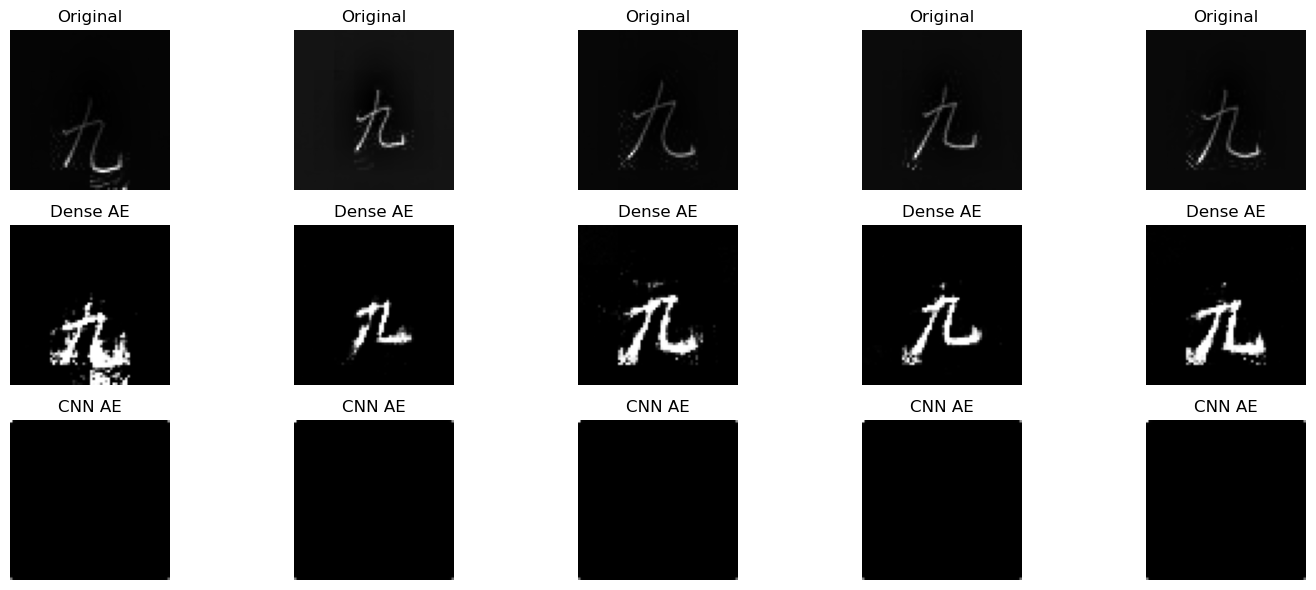

In [843]:
# Visual comparison
compare_autoencoders_visual(
    X_flattened_scaled,
    {
        "Dense AE": reconstructed_dense,
        "CNN AE": reconstructed_cnn
    }
)




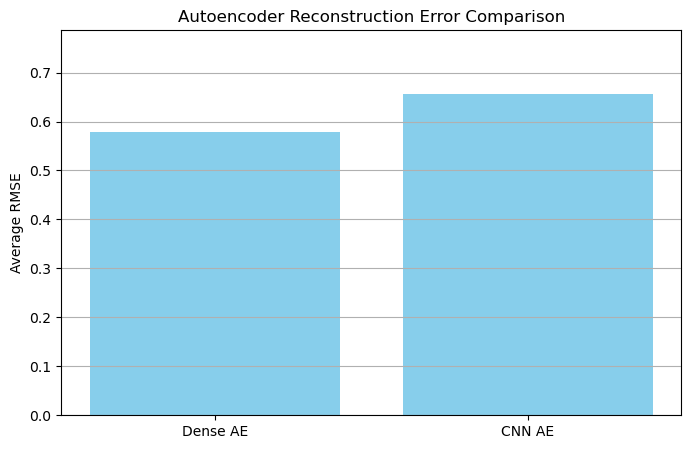

Dense AE RMSE: 0.5788
CNN AE RMSE: 0.6553


In [844]:
# RMSE comparison
compare_autoencoders_rmse(
    X_flattened_scaled,
    {
        "Dense AE": reconstructed_dense,
        "CNN AE": reconstructed_cnn
    }
)